# Standardization and Normalization

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df =sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df2 = df[['parch','pclass','age','survived']]
#here pclass ,age,and parch are independent variable
df2.head()

,parch,pclass,age,survived
0,0,3,22.0,0
1,0,1,38.0,1
2,0,3,26.0,1
3,0,1,35.0,1
4,0,3,35.0,0


In [4]:
df3 = df2.fillna(df2.mean())

In [5]:
x= df2.drop(columns=['survived'])
y= df2['survived']
x.head()

,parch,pclass,age
0,0,3,22.0
1,0,1,38.0
2,0,3,26.0
3,0,1,35.0
4,0,3,35.0


In [6]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=52)

In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 3)
(179, 3)
(712,)
(179,)


In [8]:
sc= StandardScaler()
sc.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
sc.mean_

array([ 0.39325843,  2.30477528, 29.71397188])

In [10]:
sc.scale_

array([ 0.82268371,  0.84206788, 14.73157585])

In [11]:
x_train.describe()

,parch,pclass,age
count,712.000000,712.000000,569.000000
mean,0.393258,2.304775,29.713972
std,0.823262,0.842660,14.744538
min,0.000000,1.000000,0.670000
25%,0.000000,2.000000,20.000000
50%,0.000000,3.000000,28.000000
75%,0.000000,3.000000,38.000000
max,6.000000,3.000000,80.000000


In [12]:
x_train_sc = sc.transform(x_train)
x_test_sc = sc.transform(x_test)

In [13]:
x_train_sc

array([[-0.47801898, -1.54948943,  2.055858  ],
       [-0.47801898,  0.825616  ,         nan],
       [ 0.737515  , -1.54948943,  1.037637  ],
       ...,
       [-0.47801898,  0.825616  ,  0.73217069],
       [ 0.737515  , -1.54948943,  0.9018742 ],
       [-0.47801898,  0.825616  ,  0.9018742 ]])

In [14]:
type(x_train_sc)

numpy.ndarray

In [16]:
x_train_sc = pd.DataFrame(x_train_sc,columns=['parch','pclass','age'])
x_test_sc = pd.DataFrame(x_test_sc,columns=['parch','pclass','age'])

In [17]:
x_train_sc.head()

,parch,pclass,age
0,-0.478019,-1.549489,2.055858
1,-0.478019,0.825616,NaN
2,0.737515,-1.549489,1.037637
3,1.953049,0.825616,-1.881263
4,1.953049,0.825616,-1.881263


In [19]:
x_train_sc.describe().round(2)

,parch,pclass,age
count,712.00,712.00,569.00
mean,-0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-0.48,-1.55,-1.97
25%,-0.48,-0.36,-0.66
50%,-0.48,0.83,-0.12
75%,-0.48,0.83,0.56
max,6.82,0.83,3.41


# MInMax Scalar

In [20]:
mmc = MinMaxScaler()

In [21]:
mmc.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [22]:
x_train_mmc = mmc.transform(x_train)
x_test_mmc = mmc.transform(x_test)

In [23]:
x_train_mmc

array([[0.        , 0.        , 0.74788857],
       [0.        , 1.        ,        nan],
       [0.16666667, 0.        , 0.55880499],
       ...,
       [0.        , 1.        , 0.50207992],
       [0.16666667, 0.        , 0.53359385],
       [0.        , 1.        , 0.53359385]])

In [24]:
x_train_mmc = pd.DataFrame(x_train_mmc,columns=['parch','pclass','age'])
x_test_mmc = pd.DataFrame(x_test_mmc,columns=['parch','pclass','age'])

In [25]:
x_train_mmc.describe().round(2)

,parch,pclass,age
count,712.00,712.00,569.00
mean,0.07,0.65,0.37
std,0.14,0.42,0.19
min,0.00,0.00,0.00
25%,0.00,0.50,0.24
50%,0.00,1.00,0.34
75%,0.00,1.00,0.47
max,1.00,1.00,1.00


In [26]:
x_test_sc.describe().round(2)

,parch,pclass,age
count,179.00,179.00,145.00
mean,-0.07,0.02,-0.00
std,0.89,0.96,0.93
min,-0.48,-1.55,-1.99
25%,-0.48,-0.36,-0.59
50%,-0.48,0.83,-0.05
75%,-0.48,0.83,0.63
max,5.60,0.83,2.46


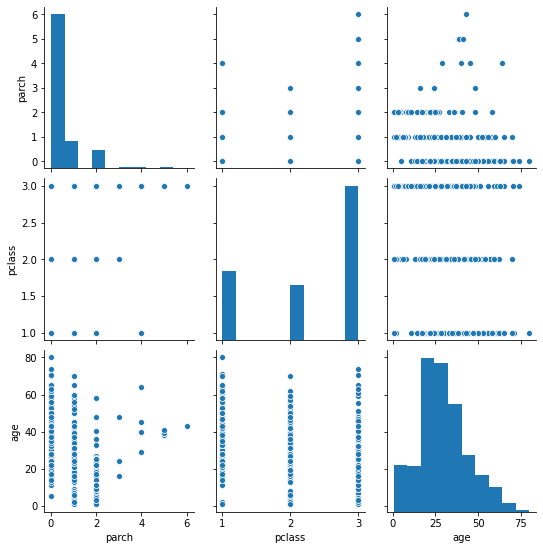

In [27]:
sns.pairplot(x_train)

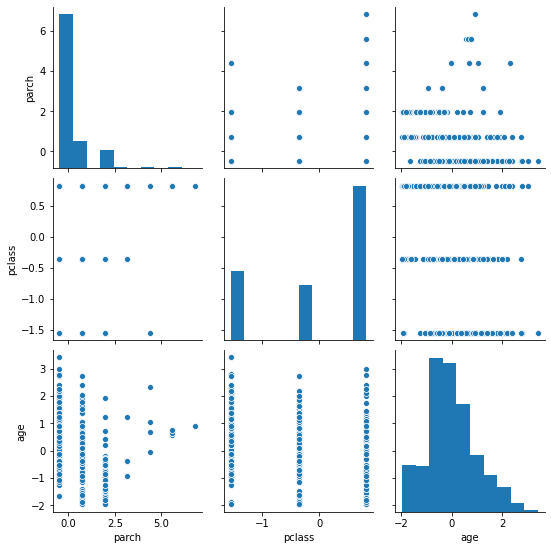

In [28]:
sns.pairplot(x_train_sc)

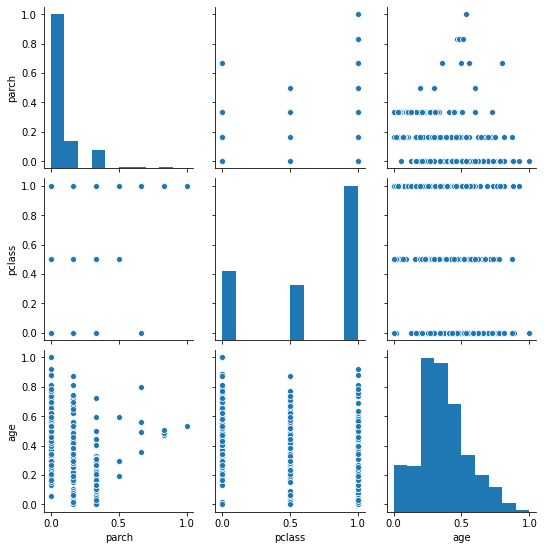

In [30]:
sns.pairplot(x_train_mmc)

In [ ]:
# before and after scaling data distibution is same